In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/tiktok_live_data_1000.csv")
df.head()


,stream_id,category,region,views,likes,duration_min,effect_used,stream_date
0,S0000,Q&A,US,9076,284,12,Sparkle Filter,2025-06-24
1,S0001,Cooking,Canada,5543,415,59,Sparkle Filter,2025-04-26
2,S0002,Beauty,Australia,2807,1434,74,NaN,2025-05-03
3,S0003,Gaming,Canada,14883,322,80,Sparkle Filter,2025-05-06
4,S0004,Education,India,5800,509,32,NaN,2025-06-12


In [8]:
df.info()
df.describe()
df.isnull().sum()
df['stream_date'] = pd.to_datetime(df['stream_date'])  # Convert to date



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   stream_id     1000 non-null   object        
 1   category      1000 non-null   object        
 2   region        1000 non-null   object        
 3   views         1000 non-null   int64         
 4   likes         1000 non-null   int64         
 5   duration_min  1000 non-null   int64         
 6   effect_used   782 non-null    object        
 7   stream_date   1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 62.6+ KB


In [9]:
df.duplicated().sum()

np.int64(0)

**Q1: What are the most popular content categories by average views?**

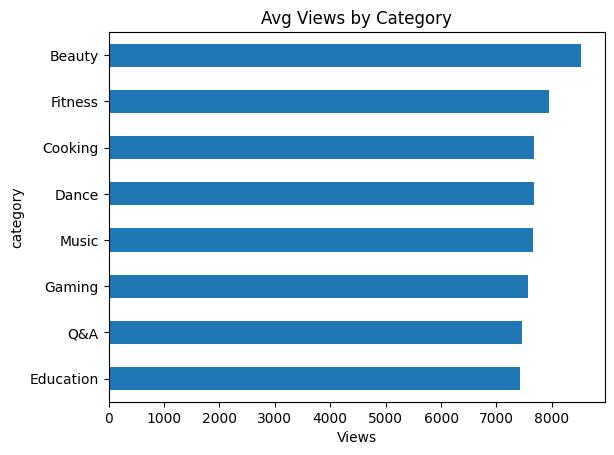

In [10]:
df.groupby('category')['views'].mean().sort_values().plot(kind='barh')
plt.title("Avg Views by Category")
plt.xlabel("Views")
plt.show()


**Q2: Which regions have the highest engagement?**

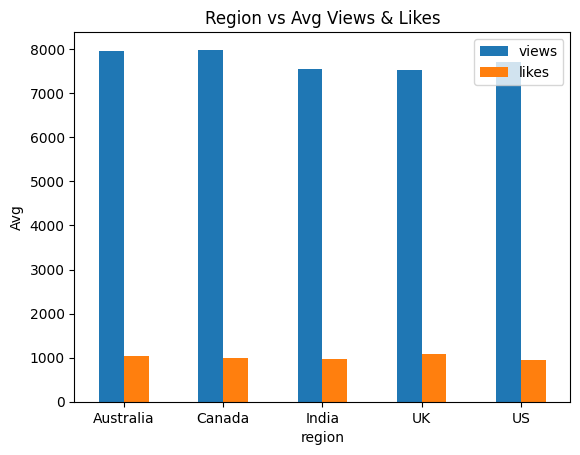

In [11]:
df.groupby('region')[['views', 'likes']].mean().plot(kind='bar')
plt.title("Region vs Avg Views & Likes")
plt.ylabel("Avg")
plt.xticks(rotation=0)
plt.show()


**Q3: Which effects get the most attention?**

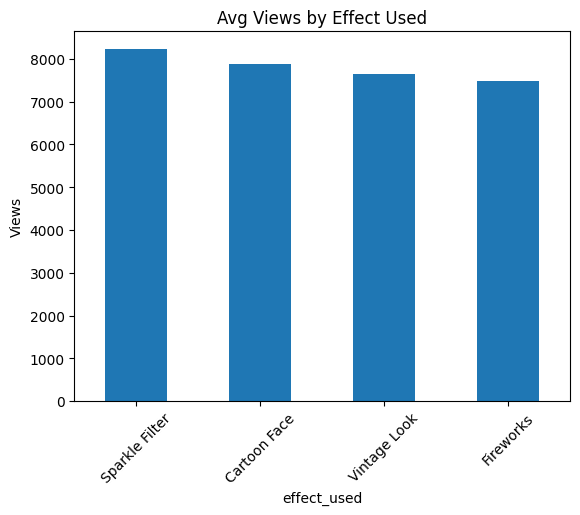

In [12]:
df.groupby('effect_used')['views'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Avg Views by Effect Used")
plt.ylabel("Views")
plt.xticks(rotation=45)
plt.show()


**Q4: Is there a relationship between stream duration and likes?**

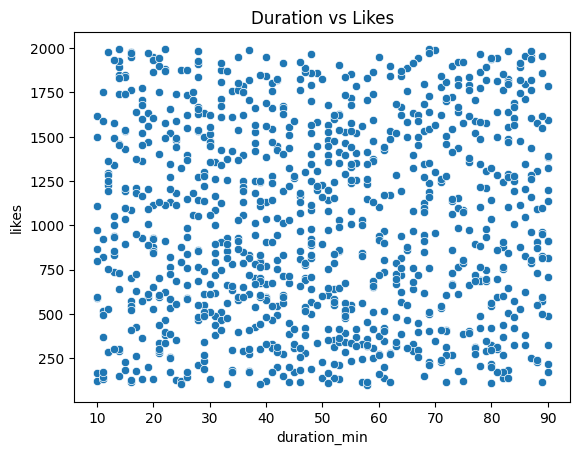

In [13]:
sns.scatterplot(x='duration_min', y='likes', data=df)
plt.title("Duration vs Likes")
plt.show()


**Q5: How does activity vary by date?**

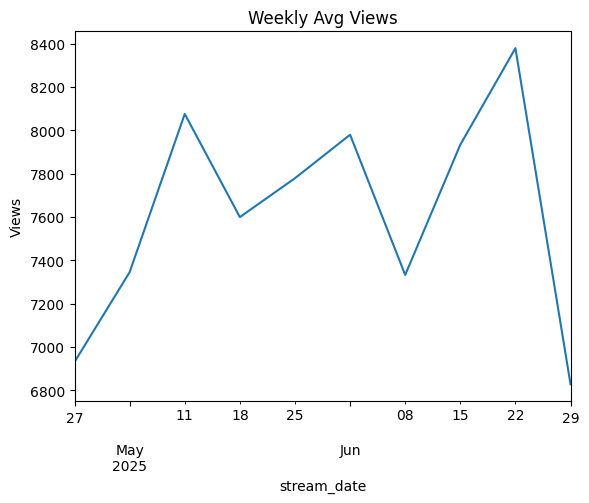

In [14]:
df.set_index('stream_date').resample('W')['views'].mean().plot()
plt.title("Weekly Avg Views")
plt.ylabel("Views")
plt.show()
